In [1]:
import pandas as pd
import numpy as np

In [33]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)

In [34]:
df1 = pd.read_csv('Admission_Predict.csv')
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [38]:
df1.shape

(400, 9)

In [39]:
df1.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [41]:
df1.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [42]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [43]:
df2 = pd.read_csv('Admission_Predict_Ver1.1.csv')
df2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
df2.shape

(500, 9)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [46]:
df2.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [47]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [48]:
df3 = pd.merge(df1,df2)
df3.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
df3.shape

(400, 9)

In [50]:
import seaborn as sns

In [51]:
df3['GRE Score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

In [52]:
df3['GRE Score'].nunique()

49

In [53]:
df3['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

In [54]:
df3['TOEFL Score'].nunique()

29

In [55]:
df3['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [56]:
df3['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [57]:
df3['Research'].unique()

array([1, 0])

In [58]:
import matplotlib.pyplot as plt

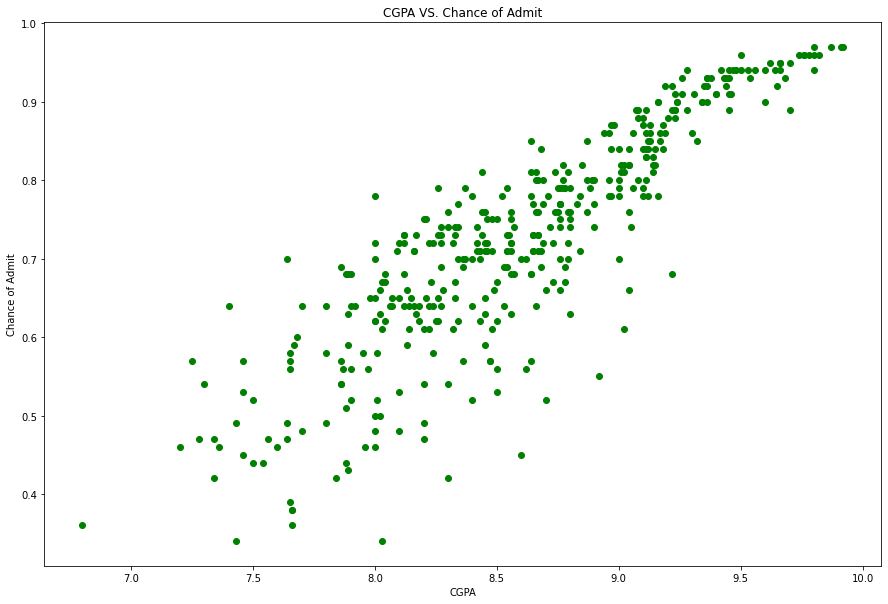

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(df3['CGPA'],df3['Chance of Admit '],c='green')
plt.title('CGPA VS. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

In [73]:
df4 = df3.drop(columns=['Serial No.','Research'])
df4

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
5,330,115,5,4.5,3.0,9.34,0.90
6,321,109,3,3.0,4.0,8.20,0.75
7,308,101,2,3.0,4.0,7.90,0.68
8,302,102,1,2.0,1.5,8.00,0.50
9,323,108,3,3.5,3.0,8.60,0.45


In [80]:
def show_boxplots(df):
    plt.rcParams['figure.figsize']==[70,26]
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df4,orient='v')
    plt.title('OUTLIER DISTRIBUTION')
    plt.ylabel("Range",fontweight='bold')
    plt.xlabel("Attributes",fontweight='bold')


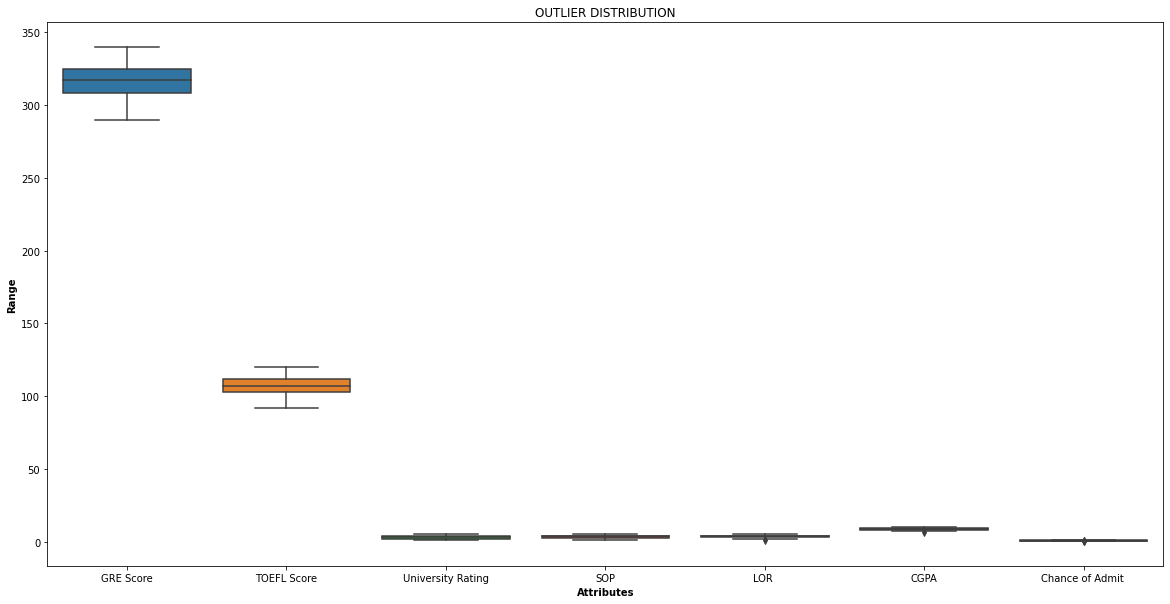

In [81]:
show_boxplots(df3)

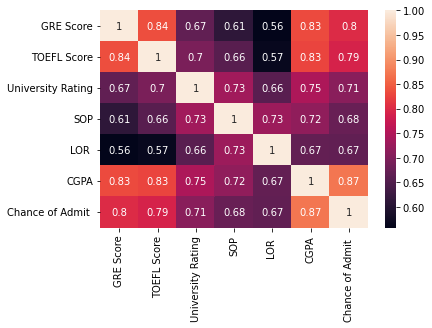

In [82]:
import seaborn as sns
corr = df4.corr()
sns.heatmap(corr,annot=True)

In [83]:
#assessing multicollinearity in the dataset
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
def vif_arr(df4):
    vif = pd.DataFrame()
    df4 = sma.add_constant(df4)
    vif["variables"] = df4.columns
    vif["VIF"] = [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
    return(vif)
vif_arr(df4)

,variables,VIF
0,const,1772.221865
1,GRE Score,4.387479
2,TOEFL Score,4.346679
3,University Rating,2.929736
4,SOP,3.057545
5,LOR,2.532003
6,CGPA,6.452425
7,Chance of Admit,4.968003


In [85]:
#Remove CGPA - high multicollinearity

In [86]:
df5 = df4.drop(columns=['CGPA'])
df5.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Chance of Admit
0,337,118,4,4.5,4.5,0.92
1,324,107,4,4.0,4.5,0.76
2,316,104,3,3.0,3.5,0.72
3,322,110,3,3.5,2.5,0.80
4,314,103,2,2.0,3.0,0.65


In [87]:
X = df5.drop(columns='Chance of Admit ')
Y = df5['Chance of Admit ']

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [89]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [90]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test,y_pred))))

In [91]:
print("\nRMSE: ", rmse)


RMSE:  0.12347570611257908


In [99]:
from six import StringIO

In [103]:
pip install --upgrade six

  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: tensorflow-docs 0.0.02b52679b70271af607a8b83bc30de4dd3352321c- has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of tensorflow-docs or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: tensorflow-examples 003510183c4a425236788b44d153b92fb4c7423a- has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer v

In [108]:
from sklearn.tree import export_graphviz  

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(model, out_file ='tree_structure.dot',
                feature_names =['GRE Score','TOEFL Score','University Rating','SOP','LOR'])